In [131]:
import pandas as pd
import numpy as np

from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.ensemble.forest import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

import matplotlib.pyplot as plt
%matplotlib inline

In [132]:
#import dataset
train = pd.read_csv('/Users/My Computer/Documents/Personal/Applications/2019/QMUL/Data Analytics/stroke_train.csv')

In [133]:
#check data imported correctly
train.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


In [134]:
#get data types of variables
train.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [135]:
#produce summary of dataset
train.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,41938.000000,43400.000000
mean,36326.142350,42.217894,0.093571,0.047512,104.482750,28.605038,0.018041
std,21072.134879,22.519649,0.291235,0.212733,43.111751,7.770020,0.133103
min,1.000000,0.080000,0.000000,0.000000,55.000000,10.100000,0.000000
25%,18038.500000,24.000000,0.000000,0.000000,77.540000,23.200000,0.000000
50%,36351.500000,44.000000,0.000000,0.000000,91.580000,27.700000,0.000000
75%,54514.250000,60.000000,0.000000,0.000000,112.070000,32.900000,0.000000
max,72943.000000,82.000000,1.000000,1.000000,291.050000,97.600000,1.000000


In [136]:
#check for missing values (bmi and smoking status)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 12 columns):
id                   43400 non-null int64
gender               43400 non-null object
age                  43400 non-null float64
hypertension         43400 non-null int64
heart_disease        43400 non-null int64
ever_married         43400 non-null object
work_type            43400 non-null object
Residence_type       43400 non-null object
avg_glucose_level    43400 non-null float64
bmi                  41938 non-null float64
smoking_status       30108 non-null object
stroke               43400 non-null int64
dtypes: float64(3), int64(4), object(5)
memory usage: 4.0+ MB


In [137]:
#drop ID column
train.drop('id', axis=1, inplace=True)

In [138]:
#count number of missing values in each row
#smoking_status missing 30.6% of values
#bmi missing 3.4% of values
train.isnull().sum()

gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                   1462
smoking_status       13292
stroke                   0
dtype: int64

In [139]:
#find count of categories in work_type
train.gender.value_counts()

#create dummy variables
gender_dummies = pd.get_dummies(train.gender, prefix='gender').iloc[:, 1:]

# concatenate columns
pd.concat([train, gender_dummies], axis=1)
train = pd.get_dummies(train, columns=['gender'], drop_first=True)

In [140]:
train

,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,gender_Male,gender_Other
0,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0,1,0
1,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0,1,0
2,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0,0,0
3,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0,0,0
4,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
43395,10.0,0,0,No,children,Urban,58.64,20.4,never smoked,0,0,0
43396,56.0,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0,0,0
43397,82.0,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0,0,0
43398,40.0,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0,1,0


In [141]:
#find count of categories in residence_type
train.Residence_type.value_counts()

#create dummy variables
residence_dummies = pd.get_dummies(train.Residence_type, prefix='residence').iloc[:, 1:]

# concatenate columns
pd.concat([train, residence_dummies], axis=1)
train = pd.get_dummies(train, columns=['Residence_type'], drop_first=True)

In [142]:
train

,age,hypertension,heart_disease,ever_married,work_type,avg_glucose_level,bmi,smoking_status,stroke,gender_Male,gender_Other,Residence_type_Urban
0,3.0,0,0,No,children,95.12,18.0,NaN,0,1,0,0
1,58.0,1,0,Yes,Private,87.96,39.2,never smoked,0,1,0,1
2,8.0,0,0,No,Private,110.89,17.6,NaN,0,0,0,1
3,70.0,0,0,Yes,Private,69.04,35.9,formerly smoked,0,0,0,0
4,14.0,0,0,No,Never_worked,161.28,19.1,NaN,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
43395,10.0,0,0,No,children,58.64,20.4,never smoked,0,0,0,1
43396,56.0,0,0,Yes,Govt_job,213.61,55.4,formerly smoked,0,0,0,1
43397,82.0,1,0,Yes,Private,91.94,28.9,formerly smoked,0,0,0,1
43398,40.0,0,0,Yes,Private,99.16,33.2,never smoked,0,1,0,1


In [143]:
#find count of categories in ever_married
train.ever_married.value_counts()

#create dummy variables
married_dummies = pd.get_dummies(train.ever_married, prefix='ever_married').iloc[:, 1:]

# concatenate columns
pd.concat([train, married_dummies], axis=1)
train = pd.get_dummies(train, columns=['ever_married'], drop_first=True)

In [144]:
train

,age,hypertension,heart_disease,work_type,avg_glucose_level,bmi,smoking_status,stroke,gender_Male,gender_Other,Residence_type_Urban,ever_married_Yes
0,3.0,0,0,children,95.12,18.0,NaN,0,1,0,0,0
1,58.0,1,0,Private,87.96,39.2,never smoked,0,1,0,1,1
2,8.0,0,0,Private,110.89,17.6,NaN,0,0,0,1,0
3,70.0,0,0,Private,69.04,35.9,formerly smoked,0,0,0,0,1
4,14.0,0,0,Never_worked,161.28,19.1,NaN,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
43395,10.0,0,0,children,58.64,20.4,never smoked,0,0,0,1,0
43396,56.0,0,0,Govt_job,213.61,55.4,formerly smoked,0,0,0,1,1
43397,82.0,1,0,Private,91.94,28.9,formerly smoked,0,0,0,1,1
43398,40.0,0,0,Private,99.16,33.2,never smoked,0,1,0,1,1


In [145]:
#find count of categories in work_type
train.work_type.value_counts()

#create dummy variables
work_dummies = pd.get_dummies(train.work_type, prefix='work_type').iloc[:, 1:]

# concatenate columns
pd.concat([train, work_dummies], axis=1)
dummy_train = pd.get_dummies(train, columns=['work_type'], drop_first=True)

In [146]:
#replace NaN values in smoking_status with never smoked
dummy_train['smoking_status'].fillna("never smoked", inplace = True) 

In [147]:
dummy_train

,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke,gender_Male,gender_Other,Residence_type_Urban,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children
0,3.0,0,0,95.12,18.0,never smoked,0,1,0,0,0,0,0,0,1
1,58.0,1,0,87.96,39.2,never smoked,0,1,0,1,1,0,1,0,0
2,8.0,0,0,110.89,17.6,never smoked,0,0,0,1,0,0,1,0,0
3,70.0,0,0,69.04,35.9,formerly smoked,0,0,0,0,1,0,1,0,0
4,14.0,0,0,161.28,19.1,never smoked,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43395,10.0,0,0,58.64,20.4,never smoked,0,0,0,1,0,0,0,0,1
43396,56.0,0,0,213.61,55.4,formerly smoked,0,0,0,1,1,0,0,0,0
43397,82.0,1,0,91.94,28.9,formerly smoked,0,0,0,1,1,0,1,0,0
43398,40.0,0,0,99.16,33.2,never smoked,0,1,0,1,1,0,1,0,0


In [148]:
#find count of categories in smoking_status
dummy_train.smoking_status.value_counts()

never smoked       29345
formerly smoked     7493
smokes              6562
Name: smoking_status, dtype: int64

In [149]:
#create dummy variables
smoking_dummies = pd.get_dummies(dummy_train.smoking_status, prefix='smoking_status').iloc[:, 1:]

#concatenate columns
pd.concat([dummy_train, smoking_dummies], axis=1)
clean_train = pd.get_dummies(dummy_train, columns=['smoking_status'], drop_first=True)

In [150]:
clean_train

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,Residence_type_Urban,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_never smoked,smoking_status_smokes
0,3.0,0,0,95.12,18.0,0,1,0,0,0,0,0,0,1,1,0
1,58.0,1,0,87.96,39.2,0,1,0,1,1,0,1,0,0,1,0
2,8.0,0,0,110.89,17.6,0,0,0,1,0,0,1,0,0,1,0
3,70.0,0,0,69.04,35.9,0,0,0,0,1,0,1,0,0,0,0
4,14.0,0,0,161.28,19.1,0,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43395,10.0,0,0,58.64,20.4,0,0,0,1,0,0,0,0,1,1,0
43396,56.0,0,0,213.61,55.4,0,0,0,1,1,0,0,0,0,0,0
43397,82.0,1,0,91.94,28.9,0,0,0,1,1,0,1,0,0,0,0
43398,40.0,0,0,99.16,33.2,0,1,0,1,1,0,1,0,0,1,0


In [151]:
clean_train.isnull().sum()

age                               0
hypertension                      0
heart_disease                     0
avg_glucose_level                 0
bmi                            1462
stroke                            0
gender_Male                       0
gender_Other                      0
Residence_type_Urban              0
ever_married_Yes                  0
work_type_Never_worked            0
work_type_Private                 0
work_type_Self-employed           0
work_type_children                0
smoking_status_never smoked       0
smoking_status_smokes             0
dtype: int64

In [152]:
#Replace all NaN values in bmi with the mean
mean_value = clean_train['bmi'].mean()
clean_train['bmi'] = clean_train['bmi'].fillna(mean_value)

In [153]:
clean_train.isnull().sum()

age                            0
hypertension                   0
heart_disease                  0
avg_glucose_level              0
bmi                            0
stroke                         0
gender_Male                    0
gender_Other                   0
Residence_type_Urban           0
ever_married_Yes               0
work_type_Never_worked         0
work_type_Private              0
work_type_Self-employed        0
work_type_children             0
smoking_status_never smoked    0
smoking_status_smokes          0
dtype: int64

In [154]:
clean_train.dtypes

age                            float64
hypertension                     int64
heart_disease                    int64
avg_glucose_level              float64
bmi                            float64
stroke                           int64
gender_Male                      uint8
gender_Other                     uint8
Residence_type_Urban             uint8
ever_married_Yes                 uint8
work_type_Never_worked           uint8
work_type_Private                uint8
work_type_Self-employed          uint8
work_type_children               uint8
smoking_status_never smoked      uint8
smoking_status_smokes            uint8
dtype: object

In [155]:
clean_train

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,Residence_type_Urban,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_never smoked,smoking_status_smokes
0,3.0,0,0,95.12,18.0,0,1,0,0,0,0,0,0,1,1,0
1,58.0,1,0,87.96,39.2,0,1,0,1,1,0,1,0,0,1,0
2,8.0,0,0,110.89,17.6,0,0,0,1,0,0,1,0,0,1,0
3,70.0,0,0,69.04,35.9,0,0,0,0,1,0,1,0,0,0,0
4,14.0,0,0,161.28,19.1,0,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43395,10.0,0,0,58.64,20.4,0,0,0,1,0,0,0,0,1,1,0
43396,56.0,0,0,213.61,55.4,0,0,0,1,1,0,0,0,0,0,0
43397,82.0,1,0,91.94,28.9,0,0,0,1,1,0,1,0,0,0,0
43398,40.0,0,0,99.16,33.2,0,1,0,1,1,0,1,0,0,1,0


In [156]:
#axis for datasets
X = clean_train.drop('stroke', axis=1)
y = clean_train['stroke']

In [157]:
#implement test train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=66)

In [158]:
# random forest model creation
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

#predictions
rfc_predict = rfc.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [159]:
#run cross validation
rfc_cv_score = cross_val_score(rfc, X, y, cv=10, scoring='roc_auc')

In [161]:
#print results
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, rfc_predict))
print('\n')

print("=== Classification Report ===")
print(classification_report(y_test, rfc_predict))
print('\n')

print("=== All AUC Scores ===")
print(rfc_cv_score)
print('\n')

print("=== Mean AUC Score ===")
print("Mean AUC Score - Random Forest: ", rfc_cv_score.mean())

=== Confusion Matrix ===
[[10612     3]
 [  234     1]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     10615
           1       0.25      0.00      0.01       235

    accuracy                           0.98     10850
   macro avg       0.61      0.50      0.50     10850
weighted avg       0.96      0.98      0.97     10850



=== All AUC Scores ===
[0.64613392 0.60414971 0.64895544 0.61160494 0.6676804  0.62248373
 0.6141919  0.61672654 0.66907973 0.63372327]


=== Mean AUC Score ===
Mean AUC Score - Random Forest:  0.6334729591086294


In [162]:
#Get numerical feature importance
feature_importances = pd.DataFrame(rfc.feature_importances_, index = X_train.columns, columns=['importance']).sort_values('importance', ascending=True)
print(feature_importances)

                             importance
work_type_Never_worked         0.000007
gender_Other                   0.000106
work_type_children             0.000319
work_type_Self-employed        0.009420
ever_married_Yes               0.011932
work_type_Private              0.013502
smoking_status_smokes          0.016618
hypertension                   0.019140
smoking_status_never smoked    0.020411
heart_disease                  0.022783
gender_Male                    0.027449
Residence_type_Urban           0.027726
age                            0.200165
bmi                            0.283357
avg_glucose_level              0.347067


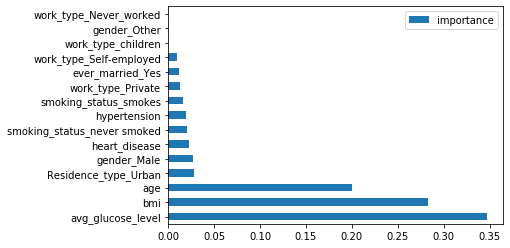

In [170]:
feature_importances.nlargest(15, 'importance').plot(kind='barh')
plt.show()